In [54]:
import pandas as pd
from pythainlp import word_tokenize

import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
import matplotlib as mpl
mpl.font_manager.fontManager.addfont("Sarabun-Regular.ttf")
mpl.rc("font", family="Sarabun")

from scipy import stats

In [77]:
STIMULI = pd.read_csv('data/stimuli_original.csv').drop("id", axis=1) ## id, sentence, is_high_rate
FILLERS = pd.read_csv('data/fillers.csv').drop("id", axis=1) ## id, sentence,i s_acceptable
df = pd.read_csv("~/Desktop/result.csv")

df = df.merge(STIMULI, how="left", left_on="stimulus", right_on="sentence").drop("sentence", axis=1)
df = df.merge(FILLERS, how="left", left_on="stimulus", right_on="sentence").drop("sentence", axis=1)
df = df[df.is_stimulus == True]

df["is_high_rate"] = df["is_high_rate"].map({1:"high rate", 0:"low rate"})
df["verb"] = df.stimulus.apply(lambda x: word_tokenize(x)[2])
df["verb"].replace("ส่งจดหมาย", "ส่ง", inplace=True)
df = df.reset_index(drop=True)
df

,date,id,age,gender,stimulus,naturality,is_stimulus,reaction_time,is_high_rate,is_acceptable,verb
0,2022-12-06 18:41:39,พลอย,30,เพศหญิง,ฉันจะเขียนรายงานให้,7,True,10.440,low rate,NaN,เขียน
1,2022-12-06 18:41:39,พลอย,30,เพศหญิง,ฉันจะสอนภาษาให้,6,True,16.313,high rate,NaN,สอน
2,2022-12-06 18:41:39,พลอย,30,เพศหญิง,ฉันจะส่งพัสดุให้,7,True,9.069,high rate,NaN,ส่ง
3,2022-12-06 18:41:39,พลอย,30,เพศหญิง,ฉันจะบอกเวลาให้,6,True,6.287,low rate,NaN,บอก
4,2022-12-06 18:49:11,ด๊อบแด๊บ,30,เพศชาย,ฉันจะสอนภาษาให้,7,True,3.528,high rate,NaN,สอน
5,2022-12-06 18:49:11,ด๊อบแด๊บ,30,เพศชาย,ฉันจะส่งพัสดุให้,7,True,6.798,high rate,NaN,ส่ง
6,2022-12-06 18:49:11,ด๊อบแด๊บ,30,เพศชาย,ฉันจะบอกเวลาให้,6,True,2.690,low rate,NaN,บอก
7,2022-12-06 18:49:11,ด๊อบแด๊บ,30,เพศชาย,ฉันจะเขียนรายงานให้,7,True,3.887,low rate,NaN,เขียน
8,2022-12-06 18:58:00,แต๊ก,30,เพศชาย,ฉันจะบอกความลับให้,2,True,13.453,low rate,NaN,บอก
9,2022-12-06 18:58:00,แต๊ก,30,เพศชาย,ฉันจะคืนหนังสือให้,3,True,5.296,high rate,NaN,คืน


[Text(0, 0.5, '')]

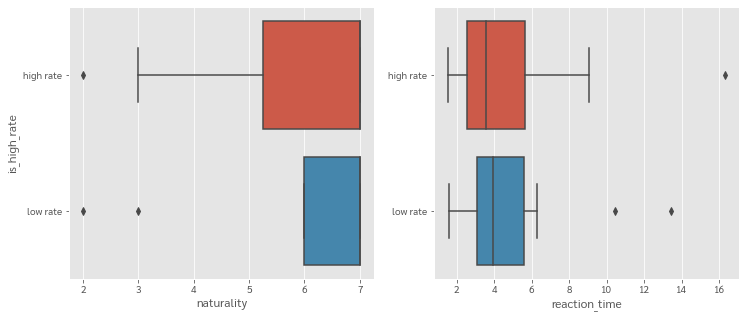

In [70]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(ax=axes[0], x="naturality", y="is_high_rate", data=df, order=["high rate", "low rate"])
sns.boxplot(ax=axes[1], x="reaction_time", y="is_high_rate", data=df, order=["high rate", "low rate"]).set(ylabel=None)

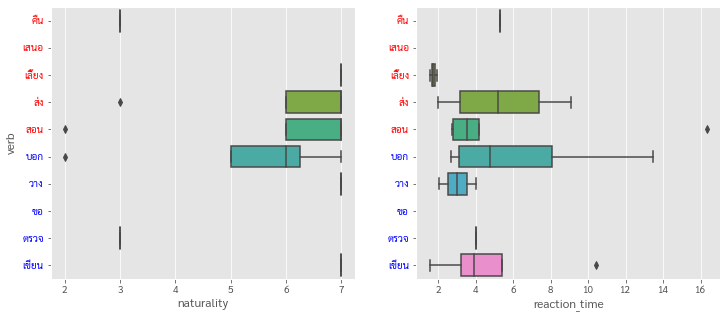

In [78]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(ax=axes[0], x="naturality", y="verb", data=df, order=["คืน","เสนอ","เลี้ยง","ส่ง","สอน","บอก","วาง","ขอ","ตรวจ","เขียน"])
sns.boxplot(ax=axes[1], x="reaction_time", y="verb", data=df, order=["คืน","เสนอ","เลี้ยง","ส่ง","สอน","บอก","วาง","ขอ","ตรวจ","เขียน"]).set(ylabel=None)
for i in range(5):
    axes[0].get_yticklabels()[i].set_color("red")
    axes[0].get_yticklabels()[i+5].set_color("blue")
    axes[1].get_yticklabels()[i].set_color("red")
    axes[1].get_yticklabels()[i+5].set_color("blue")

In [76]:
df.groupby(["verb","is_high_rate"])[["naturality","reaction_time"]].mean().sort_values("naturality", ascending=False)

,,naturality,reaction_time
verb,is_high_rate,,
วาง,low rate,7.00,3.02550
เขียน,low rate,7.00,4.90520
เลี้ยง,high rate,7.00,1.74750
ส่ง,high rate,6.00,5.34875
สอน,high rate,5.80,5.90460
บอก,low rate,5.25,6.42675
คืน,high rate,3.00,5.29600
ตรวจ,low rate,3.00,4.02400


# u-test

In [73]:
A = df[df.is_high_rate == "high rate"]["naturality"]
B = df[df.is_high_rate == "low rate"]["naturality"]

result = stats.mannwhitneyu(A, B, alternative='two-sided')
print('p-value:',round(result.pvalue, 5))

p-value: 0.945


In [79]:
len(A)

12